# Contents

- library import
- data import
- address data security
- create geographic regions
- remove customers with less than 5 orders
- create customer profiles
- visualizations

## Import libraries and data frame (Q1)


In [3]:
# library imports

import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns
import scipy

In [4]:
# create a string for the project folder path

path = r'/Users/Ashley/Desktop/Adam/Achievement 4/Instacart Analysis'

In [5]:
# import the latest data frame

df = pd.read_pickle(os.path.join(path, '02 Data', 'Prepared Data', 'orders_products_customers_merged.pkl'))

In [6]:
# allow notebook to show all columns of the data frame

pd.set_option('display.max_columns', None)

In [7]:
# verify data frame import was successful

df.head()

,product_id,product_name,aisle_id,department_id,prices,order_id,user_id,order_number,orders_day_of_week,order_hour_of_day,days_since_prior_order,first_order,add_to_cart_order,reordered,_merge,busiest_day,price_range_loc,busiest_days,busiest_period_of_day,max_order,loyalty_flag,average_price,spending_flag,days_since_median,frequency_flag,first_name,last_name,gender,state,age,date_joined,num_of_dependants,fam_status,income
0,1,Chocolate Sandwich Cookies,61,19,5.8,3139998,138,28,6,11,3.0,False,5,0,both,Regularly Busy,Mid Range Product,Regular Days,Most Orders,32,Regular Customer,6.935811,Low Spender,8.0,Frequent Customer,Charles,Cox,Male,Minnesota,81,8/1/2019,1,married,49620
1,1,Chocolate Sandwich Cookies,61,19,5.8,1977647,138,30,6,17,20.0,False,1,1,both,Regularly Busy,Mid Range Product,Regular Days,Average Orders,32,Regular Customer,6.935811,Low Spender,8.0,Frequent Customer,Charles,Cox,Male,Minnesota,81,8/1/2019,1,married,49620
2,907,Premium Sliced Bacon,106,12,20.0,3160996,138,1,5,13,NaN,True,4,0,both,Regularly Busy,High Range Product,Regular Days,Most Orders,32,Regular Customer,6.935811,Low Spender,8.0,Frequent Customer,Charles,Cox,Male,Minnesota,81,8/1/2019,1,married,49620
3,907,Premium Sliced Bacon,106,12,20.0,2254091,138,10,5,14,6.0,False,1,1,both,Regularly Busy,High Range Product,Regular Days,Most Orders,32,Regular Customer,6.935811,Low Spender,8.0,Frequent Customer,Charles,Cox,Male,Minnesota,81,8/1/2019,1,married,49620
4,1000,Apricots,18,10,12.9,505689,138,9,6,12,7.0,False,5,0,both,Regularly Busy,Mid Range Product,Regular Days,Most Orders,32,Regular Customer,6.935811,Low Spender,8.0,Frequent Customer,Charles,Cox,Male,Minnesota,81,8/1/2019,1,married,49620


## Consider security implications (Q2)

The data frame now contains presonally identifiable information with the addition of the first and last name columns. For these customers we also have the state they are in, their age, marital status, number of dependents, and annual income. Since the user_id column already exists we could potentially look to take out the first and last name columns. Without these we would not lose any functionality and the data frame would no longer contain any PII. The age, state, etc. columns would be fine to stay in as without the names to go with them it would not be possible to track these to a specific individual. 

## Observe customer behavior by geographic area (Q3)

In [8]:
# assign a region for each state

result = []

for value in df['state']:
    if value in('Maine', 'New Hampshire', 'Vermont', 'Massachusetts', 'Rhode Island', 'Connecticut',
               'New York', 'Pennsylvania', 'New Jersey'):
        result.append('Northeast')
    elif value in('Wisconsin', 'Michigan', 'Illinois', 'Indiana', 'Ohio', 'North Dakota', 'South Dakota',
                 'Nebraska', 'Kansas', 'Minnesota', 'Iowa', 'Missouri'):
        result.append('Midwest')
    elif value in('Delaware', 'Maryland', 'District of Columbia', 'Virginia', 'West Virginia', 'North Carolina',
                 'South Carolina', 'Georgia', 'Florida', 'Kentucky', 'Tennessee', 'Mississippi', 'Alabama',
                 'Oklahoma', 'Texas', 'Arkansas', 'Louisiana'):
        result.append('South')
    elif value in('Idaho', 'Montana', 'Wyoming', 'Nevada', 'Utah', 'Colorado', 'Arizona', 'New Mexico',
                 'Alaska', 'Washington', 'Oregon', 'California', 'Hawaii'):
        result.append('West')

In [9]:
# print the 'result'

result

['Midwest',
 'Midwest',
 'Midwest',
 'Midwest',
 'Midwest',
 'Midwest',
 'Midwest',
 'Midwest',
 'Midwest',
 'Midwest',
 'Midwest',
 'Midwest',
 'Midwest',
 'Midwest',
 'Midwest',
 'Midwest',
 'Midwest',
 'Midwest',
 'Midwest',
 'Midwest',
 'Midwest',
 'Midwest',
 'Midwest',
 'Midwest',
 'Midwest',
 'Midwest',
 'Midwest',
 'Midwest',
 'Midwest',
 'Midwest',
 'Midwest',
 'Midwest',
 'Midwest',
 'Midwest',
 'Midwest',
 'Midwest',
 'Midwest',
 'Midwest',
 'Midwest',
 'Midwest',
 'Midwest',
 'Midwest',
 'Midwest',
 'Midwest',
 'Midwest',
 'Midwest',
 'Midwest',
 'Midwest',
 'Midwest',
 'Midwest',
 'Midwest',
 'Midwest',
 'Midwest',
 'Midwest',
 'Midwest',
 'Midwest',
 'Midwest',
 'Midwest',
 'Midwest',
 'Midwest',
 'Midwest',
 'Midwest',
 'Midwest',
 'Midwest',
 'Midwest',
 'Midwest',
 'Midwest',
 'Midwest',
 'Midwest',
 'Midwest',
 'Midwest',
 'Midwest',
 'Midwest',
 'Midwest',
 'Midwest',
 'Midwest',
 'Midwest',
 'Midwest',
 'Midwest',
 'Midwest',
 'Midwest',
 'Midwest',
 'Midwest',
 'Mi

In [10]:
# merge 'result' in to the data frame as 'region'

df['region'] = result

In [11]:
# check the value counts for each of the newly assigned regions

df['region'].value_counts(dropna = False)

South        10791885
West          8292913
Midwest       7597325
Northeast     5722736
Name: region, dtype: int64

In [12]:
# find the sum of the value counts

10791885 + 8292913+ 7597325 + 5722736

32404859

In [13]:
# verify sum of value counts is equal to total rows in the data frame

df.shape

(32404859, 35)

In [14]:
# view the new column in the data frame 

df.head()

,product_id,product_name,aisle_id,department_id,prices,order_id,user_id,order_number,orders_day_of_week,order_hour_of_day,days_since_prior_order,first_order,add_to_cart_order,reordered,_merge,busiest_day,price_range_loc,busiest_days,busiest_period_of_day,max_order,loyalty_flag,average_price,spending_flag,days_since_median,frequency_flag,first_name,last_name,gender,state,age,date_joined,num_of_dependants,fam_status,income,region
0,1,Chocolate Sandwich Cookies,61,19,5.8,3139998,138,28,6,11,3.0,False,5,0,both,Regularly Busy,Mid Range Product,Regular Days,Most Orders,32,Regular Customer,6.935811,Low Spender,8.0,Frequent Customer,Charles,Cox,Male,Minnesota,81,8/1/2019,1,married,49620,Midwest
1,1,Chocolate Sandwich Cookies,61,19,5.8,1977647,138,30,6,17,20.0,False,1,1,both,Regularly Busy,Mid Range Product,Regular Days,Average Orders,32,Regular Customer,6.935811,Low Spender,8.0,Frequent Customer,Charles,Cox,Male,Minnesota,81,8/1/2019,1,married,49620,Midwest
2,907,Premium Sliced Bacon,106,12,20.0,3160996,138,1,5,13,NaN,True,4,0,both,Regularly Busy,High Range Product,Regular Days,Most Orders,32,Regular Customer,6.935811,Low Spender,8.0,Frequent Customer,Charles,Cox,Male,Minnesota,81,8/1/2019,1,married,49620,Midwest
3,907,Premium Sliced Bacon,106,12,20.0,2254091,138,10,5,14,6.0,False,1,1,both,Regularly Busy,High Range Product,Regular Days,Most Orders,32,Regular Customer,6.935811,Low Spender,8.0,Frequent Customer,Charles,Cox,Male,Minnesota,81,8/1/2019,1,married,49620,Midwest
4,1000,Apricots,18,10,12.9,505689,138,9,6,12,7.0,False,5,0,both,Regularly Busy,Mid Range Product,Regular Days,Most Orders,32,Regular Customer,6.935811,Low Spender,8.0,Frequent Customer,Charles,Cox,Male,Minnesota,81,8/1/2019,1,married,49620,Midwest


In [15]:
# create a crosstab of the spending flag column and region

crosstab = pd.crosstab(df['region'], df['spending_flag'], dropna = False)

In [16]:
crosstab.to_clipboard()

In [17]:
crosstab

spending_flag,High Spender,Low Spender
region,,
Midwest,155975,7441350
Northeast,108225,5614511
South,209691,10582194
West,160354,8132559


In [18]:
# determine the proportion of high to low spenders for each region

M = (155968 / (155968 + 7441357)) * 100
N = (108200 / (108200 + 5614536)) * 100
S = (209691 / (209691 + 10582194)) * 100
W = (160354 / (160354 + 8132559)) * 100

In [19]:
print(M)
print(N)
print(S)
print(W)

2.052933104744104
1.8907040268850424
1.9430433144904713
1.9336269414619447


The midwest has the highest percentage of high spenders in its customer base and the north east has the lowest. 

## Create a new data frame removing customers with under 5 orders (Q4)

In [20]:
# locate all rows with less than 5 orders and mark them as low activity customers

df.loc[df['max_order'] <5, 'exclusion_flag'] = 'Low Activity'

In [21]:
# locate all rows with 5 or more orders and mark them as normal activity customers

df.loc[df['max_order'] >=5, 'exclusion_flag'] = 'Normal Activity'

In [22]:
# view how many of each activity level there are

df['exclusion_flag'].value_counts(dropna = False)

Normal Activity    30964564
Low Activity        1440295
Name: exclusion_flag, dtype: int64

In [23]:
# create a new data frame dropping all the low activity customers

df_normal_activity = df[df['exclusion_flag'] == 'Normal Activity']

In [24]:
# check the shape of the new DF to verify it has 30,964,564 rows

df_normal_activity.shape

(30964564, 36)

In [25]:
# export the new DF

df.to_pickle(os.path.join(path, '02 Data', 'Prepared Data', 'normal_activity_customers.pkl'))

## Customer profiling (Q5)

In [26]:
# view statistics for the age, income, and dependants categories 
# create flags for orders containing certain department_ids

## Age

In [27]:
# view statistics for the age category

df['age'].describe()

count    3.240486e+07
mean     4.946527e+01
std      1.848558e+01
min      1.800000e+01
25%      3.300000e+01
50%      4.900000e+01
75%      6.500000e+01
max      8.100000e+01
Name: age, dtype: float64

In [28]:
# create buckets for different age ranges

age_profile = []

for value in df['age']:
    if (value >=18) and (value <=29):
        age_profile.append('Young')
    elif (value>=30) and (value <=49):
        age_profile.append('Middle Age')
    elif (value>=50):
        age_profile.append('Old')

In [29]:
# check the resulting list

age_profile

['Old',
 'Old',
 'Old',
 'Old',
 'Old',
 'Old',
 'Old',
 'Old',
 'Old',
 'Old',
 'Old',
 'Old',
 'Old',
 'Old',
 'Old',
 'Old',
 'Old',
 'Old',
 'Old',
 'Old',
 'Old',
 'Old',
 'Old',
 'Old',
 'Old',
 'Old',
 'Old',
 'Old',
 'Old',
 'Old',
 'Old',
 'Old',
 'Old',
 'Old',
 'Old',
 'Old',
 'Old',
 'Old',
 'Old',
 'Old',
 'Old',
 'Old',
 'Old',
 'Old',
 'Old',
 'Old',
 'Old',
 'Old',
 'Old',
 'Old',
 'Old',
 'Old',
 'Old',
 'Old',
 'Old',
 'Old',
 'Old',
 'Old',
 'Old',
 'Old',
 'Old',
 'Old',
 'Old',
 'Old',
 'Old',
 'Old',
 'Old',
 'Old',
 'Old',
 'Old',
 'Old',
 'Old',
 'Old',
 'Old',
 'Old',
 'Old',
 'Old',
 'Old',
 'Old',
 'Old',
 'Old',
 'Old',
 'Old',
 'Old',
 'Old',
 'Old',
 'Old',
 'Old',
 'Old',
 'Old',
 'Old',
 'Old',
 'Old',
 'Old',
 'Old',
 'Old',
 'Old',
 'Old',
 'Old',
 'Old',
 'Old',
 'Old',
 'Old',
 'Old',
 'Old',
 'Old',
 'Old',
 'Old',
 'Old',
 'Old',
 'Old',
 'Old',
 'Old',
 'Old',
 'Old',
 'Old',
 'Old',
 'Old',
 'Old',
 'Old',
 'Old',
 'Old',
 'Old',
 'Old',
 'Old',


In [30]:
# add the list to the data frame

df['age_profile'] = age_profile

In [31]:
# check the data frame

df.head()

,product_id,product_name,aisle_id,department_id,prices,order_id,user_id,order_number,orders_day_of_week,order_hour_of_day,days_since_prior_order,first_order,add_to_cart_order,reordered,_merge,busiest_day,price_range_loc,busiest_days,busiest_period_of_day,max_order,loyalty_flag,average_price,spending_flag,days_since_median,frequency_flag,first_name,last_name,gender,state,age,date_joined,num_of_dependants,fam_status,income,region,exclusion_flag,age_profile
0,1,Chocolate Sandwich Cookies,61,19,5.8,3139998,138,28,6,11,3.0,False,5,0,both,Regularly Busy,Mid Range Product,Regular Days,Most Orders,32,Regular Customer,6.935811,Low Spender,8.0,Frequent Customer,Charles,Cox,Male,Minnesota,81,8/1/2019,1,married,49620,Midwest,Normal Activity,Old
1,1,Chocolate Sandwich Cookies,61,19,5.8,1977647,138,30,6,17,20.0,False,1,1,both,Regularly Busy,Mid Range Product,Regular Days,Average Orders,32,Regular Customer,6.935811,Low Spender,8.0,Frequent Customer,Charles,Cox,Male,Minnesota,81,8/1/2019,1,married,49620,Midwest,Normal Activity,Old
2,907,Premium Sliced Bacon,106,12,20.0,3160996,138,1,5,13,NaN,True,4,0,both,Regularly Busy,High Range Product,Regular Days,Most Orders,32,Regular Customer,6.935811,Low Spender,8.0,Frequent Customer,Charles,Cox,Male,Minnesota,81,8/1/2019,1,married,49620,Midwest,Normal Activity,Old
3,907,Premium Sliced Bacon,106,12,20.0,2254091,138,10,5,14,6.0,False,1,1,both,Regularly Busy,High Range Product,Regular Days,Most Orders,32,Regular Customer,6.935811,Low Spender,8.0,Frequent Customer,Charles,Cox,Male,Minnesota,81,8/1/2019,1,married,49620,Midwest,Normal Activity,Old
4,1000,Apricots,18,10,12.9,505689,138,9,6,12,7.0,False,5,0,both,Regularly Busy,Mid Range Product,Regular Days,Most Orders,32,Regular Customer,6.935811,Low Spender,8.0,Frequent Customer,Charles,Cox,Male,Minnesota,81,8/1/2019,1,married,49620,Midwest,Normal Activity,Old


In [32]:
# check value counts of the new age profile column

df['age_profile'].value_counts(dropna = False)

Old           16131430
Middle Age    10182988
Young          6090441
Name: age_profile, dtype: int64

## Income

In [33]:
# view statistics for the income category

df['income'].describe()

count    3.240486e+07
mean     9.943773e+04
std      4.305727e+04
min      2.590300e+04
25%      6.700400e+04
50%      9.661800e+04
75%      1.279120e+05
max      5.939010e+05
Name: income, dtype: float64

In [34]:
# create buckets for different income ranges

income_profile = []

for value in df['income']:
    if (value<40000):
        income_profile.append('Low Earner')
    elif(value>=40000) and (value<125000):
        income_profile.append('Moderate Earner')
    elif(value>=125000) and (value<250000):
        income_profile.append('High Earner')
    elif(value>=250000):
        income_profile.append('Very High Earner')

In [35]:
# view the list 

income_profile

['Moderate Earner',
 'Moderate Earner',
 'Moderate Earner',
 'Moderate Earner',
 'Moderate Earner',
 'Moderate Earner',
 'Moderate Earner',
 'Moderate Earner',
 'Moderate Earner',
 'Moderate Earner',
 'Moderate Earner',
 'Moderate Earner',
 'Moderate Earner',
 'Moderate Earner',
 'Moderate Earner',
 'Moderate Earner',
 'Moderate Earner',
 'Moderate Earner',
 'Moderate Earner',
 'Moderate Earner',
 'Moderate Earner',
 'Moderate Earner',
 'Moderate Earner',
 'Moderate Earner',
 'Moderate Earner',
 'Moderate Earner',
 'Moderate Earner',
 'Moderate Earner',
 'Moderate Earner',
 'Moderate Earner',
 'Moderate Earner',
 'Moderate Earner',
 'Moderate Earner',
 'Moderate Earner',
 'Moderate Earner',
 'Moderate Earner',
 'Moderate Earner',
 'Moderate Earner',
 'Moderate Earner',
 'Moderate Earner',
 'Moderate Earner',
 'Moderate Earner',
 'Moderate Earner',
 'Moderate Earner',
 'Moderate Earner',
 'Moderate Earner',
 'Moderate Earner',
 'Moderate Earner',
 'Moderate Earner',
 'Moderate Earner',


In [36]:
# add the list to the DF

df['income_profile'] = income_profile

In [37]:
# check the data frame

df.head()

,product_id,product_name,aisle_id,department_id,prices,order_id,user_id,order_number,orders_day_of_week,order_hour_of_day,days_since_prior_order,first_order,add_to_cart_order,reordered,_merge,busiest_day,price_range_loc,busiest_days,busiest_period_of_day,max_order,loyalty_flag,average_price,spending_flag,days_since_median,frequency_flag,first_name,last_name,gender,state,age,date_joined,num_of_dependants,fam_status,income,region,exclusion_flag,age_profile,income_profile
0,1,Chocolate Sandwich Cookies,61,19,5.8,3139998,138,28,6,11,3.0,False,5,0,both,Regularly Busy,Mid Range Product,Regular Days,Most Orders,32,Regular Customer,6.935811,Low Spender,8.0,Frequent Customer,Charles,Cox,Male,Minnesota,81,8/1/2019,1,married,49620,Midwest,Normal Activity,Old,Moderate Earner
1,1,Chocolate Sandwich Cookies,61,19,5.8,1977647,138,30,6,17,20.0,False,1,1,both,Regularly Busy,Mid Range Product,Regular Days,Average Orders,32,Regular Customer,6.935811,Low Spender,8.0,Frequent Customer,Charles,Cox,Male,Minnesota,81,8/1/2019,1,married,49620,Midwest,Normal Activity,Old,Moderate Earner
2,907,Premium Sliced Bacon,106,12,20.0,3160996,138,1,5,13,NaN,True,4,0,both,Regularly Busy,High Range Product,Regular Days,Most Orders,32,Regular Customer,6.935811,Low Spender,8.0,Frequent Customer,Charles,Cox,Male,Minnesota,81,8/1/2019,1,married,49620,Midwest,Normal Activity,Old,Moderate Earner
3,907,Premium Sliced Bacon,106,12,20.0,2254091,138,10,5,14,6.0,False,1,1,both,Regularly Busy,High Range Product,Regular Days,Most Orders,32,Regular Customer,6.935811,Low Spender,8.0,Frequent Customer,Charles,Cox,Male,Minnesota,81,8/1/2019,1,married,49620,Midwest,Normal Activity,Old,Moderate Earner
4,1000,Apricots,18,10,12.9,505689,138,9,6,12,7.0,False,5,0,both,Regularly Busy,Mid Range Product,Regular Days,Most Orders,32,Regular Customer,6.935811,Low Spender,8.0,Frequent Customer,Charles,Cox,Male,Minnesota,81,8/1/2019,1,married,49620,Midwest,Normal Activity,Old,Moderate Earner


In [38]:
# view frequencies for the new column

df['income_profile'].value_counts(dropna = False)

Moderate Earner     22046704
High Earner          8448377
Low Earner           1727198
Very High Earner      182580
Name: income_profile, dtype: int64

## Dependants

In [39]:
# view statistics for the depandants column

df['num_of_dependants'].describe()

count    3.240486e+07
mean     1.501896e+00
std      1.118865e+00
min      0.000000e+00
25%      1.000000e+00
50%      2.000000e+00
75%      3.000000e+00
max      3.000000e+00
Name: num_of_dependants, dtype: float64

In [40]:
# create buckets for parents vs non parents

parent_profile = []

for value in df['num_of_dependants']:
    if (value==0):
        parent_profile.append('Non-Parent')
    elif (value>0):
        parent_profile.append('Parent')

In [41]:
# view the list

parent_profile

['Parent',
 'Parent',
 'Parent',
 'Parent',
 'Parent',
 'Parent',
 'Parent',
 'Parent',
 'Parent',
 'Parent',
 'Parent',
 'Parent',
 'Parent',
 'Parent',
 'Parent',
 'Parent',
 'Parent',
 'Parent',
 'Parent',
 'Parent',
 'Parent',
 'Parent',
 'Parent',
 'Parent',
 'Parent',
 'Parent',
 'Parent',
 'Parent',
 'Parent',
 'Parent',
 'Parent',
 'Parent',
 'Parent',
 'Parent',
 'Parent',
 'Parent',
 'Parent',
 'Parent',
 'Parent',
 'Parent',
 'Parent',
 'Parent',
 'Parent',
 'Parent',
 'Parent',
 'Parent',
 'Parent',
 'Parent',
 'Parent',
 'Parent',
 'Parent',
 'Parent',
 'Parent',
 'Parent',
 'Parent',
 'Parent',
 'Parent',
 'Parent',
 'Parent',
 'Parent',
 'Parent',
 'Parent',
 'Parent',
 'Parent',
 'Parent',
 'Parent',
 'Parent',
 'Parent',
 'Parent',
 'Parent',
 'Parent',
 'Parent',
 'Parent',
 'Parent',
 'Parent',
 'Parent',
 'Parent',
 'Parent',
 'Parent',
 'Parent',
 'Parent',
 'Parent',
 'Parent',
 'Parent',
 'Parent',
 'Parent',
 'Parent',
 'Parent',
 'Parent',
 'Parent',
 'Parent',

In [42]:
# add the new column to the DF

df['parent_flag'] = parent_profile

In [43]:
# check the data frame

df.head()

,product_id,product_name,aisle_id,department_id,prices,order_id,user_id,order_number,orders_day_of_week,order_hour_of_day,days_since_prior_order,first_order,add_to_cart_order,reordered,_merge,busiest_day,price_range_loc,busiest_days,busiest_period_of_day,max_order,loyalty_flag,average_price,spending_flag,days_since_median,frequency_flag,first_name,last_name,gender,state,age,date_joined,num_of_dependants,fam_status,income,region,exclusion_flag,age_profile,income_profile,parent_flag
0,1,Chocolate Sandwich Cookies,61,19,5.8,3139998,138,28,6,11,3.0,False,5,0,both,Regularly Busy,Mid Range Product,Regular Days,Most Orders,32,Regular Customer,6.935811,Low Spender,8.0,Frequent Customer,Charles,Cox,Male,Minnesota,81,8/1/2019,1,married,49620,Midwest,Normal Activity,Old,Moderate Earner,Parent
1,1,Chocolate Sandwich Cookies,61,19,5.8,1977647,138,30,6,17,20.0,False,1,1,both,Regularly Busy,Mid Range Product,Regular Days,Average Orders,32,Regular Customer,6.935811,Low Spender,8.0,Frequent Customer,Charles,Cox,Male,Minnesota,81,8/1/2019,1,married,49620,Midwest,Normal Activity,Old,Moderate Earner,Parent
2,907,Premium Sliced Bacon,106,12,20.0,3160996,138,1,5,13,NaN,True,4,0,both,Regularly Busy,High Range Product,Regular Days,Most Orders,32,Regular Customer,6.935811,Low Spender,8.0,Frequent Customer,Charles,Cox,Male,Minnesota,81,8/1/2019,1,married,49620,Midwest,Normal Activity,Old,Moderate Earner,Parent
3,907,Premium Sliced Bacon,106,12,20.0,2254091,138,10,5,14,6.0,False,1,1,both,Regularly Busy,High Range Product,Regular Days,Most Orders,32,Regular Customer,6.935811,Low Spender,8.0,Frequent Customer,Charles,Cox,Male,Minnesota,81,8/1/2019,1,married,49620,Midwest,Normal Activity,Old,Moderate Earner,Parent
4,1000,Apricots,18,10,12.9,505689,138,9,6,12,7.0,False,5,0,both,Regularly Busy,Mid Range Product,Regular Days,Most Orders,32,Regular Customer,6.935811,Low Spender,8.0,Frequent Customer,Charles,Cox,Male,Minnesota,81,8/1/2019,1,married,49620,Midwest,Normal Activity,Old,Moderate Earner,Parent


In [44]:
# check frequencies in the new column

df['parent_flag'].value_counts(dropna = False)

Parent        24307356
Non-Parent     8097503
Name: parent_flag, dtype: int64

## Departments

In [45]:
# import the departments data set

df_dept = pd.read_csv(os.path.join(path, '02 Data', 'Prepared Data', 'departments_wrangled.csv'))

In [46]:
df_dept.head(25)

,Unnamed: 0,department
0,1,frozen
1,2,other
2,3,bakery
3,4,produce
4,5,alcohol
5,6,international
6,7,beverages
7,8,pets
8,9,dry goods pasta
9,10,bulk


In [47]:
# create a flags for certain types of purchase
# orders with dept id 5 = Drinker
# orders with dept id 8 = Pet Owner
# orders with dept id 12 = Meat Eater
# orders with dept id 18 = Parents w/ New Baby

order_profile = []

for value in df['department_id']:
    if value == 5:
        order_profile.append('Drinker')
    elif value == 8:
        order_profile.append('Pet Owner')
    elif value == 12:
        order_profile.append('Meat Eater')
    elif value == 18:
        order_profile.append('Parent w/ New Baby')
    else :
        order_profile.append('None Assigned')

In [48]:
# view the list

order_profile

['None Assigned',
 'None Assigned',
 'Meat Eater',
 'Meat Eater',
 'None Assigned',
 'None Assigned',
 'None Assigned',
 'None Assigned',
 'None Assigned',
 'None Assigned',
 'None Assigned',
 'None Assigned',
 'None Assigned',
 'None Assigned',
 'None Assigned',
 'None Assigned',
 'None Assigned',
 'None Assigned',
 'None Assigned',
 'None Assigned',
 'None Assigned',
 'None Assigned',
 'None Assigned',
 'None Assigned',
 'None Assigned',
 'None Assigned',
 'None Assigned',
 'None Assigned',
 'None Assigned',
 'None Assigned',
 'None Assigned',
 'None Assigned',
 'None Assigned',
 'None Assigned',
 'None Assigned',
 'None Assigned',
 'None Assigned',
 'None Assigned',
 'None Assigned',
 'None Assigned',
 'None Assigned',
 'None Assigned',
 'None Assigned',
 'None Assigned',
 'None Assigned',
 'None Assigned',
 'None Assigned',
 'None Assigned',
 'None Assigned',
 'None Assigned',
 'None Assigned',
 'None Assigned',
 'None Assigned',
 'None Assigned',
 'None Assigned',
 'None Assigned'

In [49]:
# add to the DF

df['order_profile'] = order_profile

In [50]:
# check the DF

df.head()

,product_id,product_name,aisle_id,department_id,prices,order_id,user_id,order_number,orders_day_of_week,order_hour_of_day,days_since_prior_order,first_order,add_to_cart_order,reordered,_merge,busiest_day,price_range_loc,busiest_days,busiest_period_of_day,max_order,loyalty_flag,average_price,spending_flag,days_since_median,frequency_flag,first_name,last_name,gender,state,age,date_joined,num_of_dependants,fam_status,income,region,exclusion_flag,age_profile,income_profile,parent_flag,order_profile
0,1,Chocolate Sandwich Cookies,61,19,5.8,3139998,138,28,6,11,3.0,False,5,0,both,Regularly Busy,Mid Range Product,Regular Days,Most Orders,32,Regular Customer,6.935811,Low Spender,8.0,Frequent Customer,Charles,Cox,Male,Minnesota,81,8/1/2019,1,married,49620,Midwest,Normal Activity,Old,Moderate Earner,Parent,None Assigned
1,1,Chocolate Sandwich Cookies,61,19,5.8,1977647,138,30,6,17,20.0,False,1,1,both,Regularly Busy,Mid Range Product,Regular Days,Average Orders,32,Regular Customer,6.935811,Low Spender,8.0,Frequent Customer,Charles,Cox,Male,Minnesota,81,8/1/2019,1,married,49620,Midwest,Normal Activity,Old,Moderate Earner,Parent,None Assigned
2,907,Premium Sliced Bacon,106,12,20.0,3160996,138,1,5,13,NaN,True,4,0,both,Regularly Busy,High Range Product,Regular Days,Most Orders,32,Regular Customer,6.935811,Low Spender,8.0,Frequent Customer,Charles,Cox,Male,Minnesota,81,8/1/2019,1,married,49620,Midwest,Normal Activity,Old,Moderate Earner,Parent,Meat Eater
3,907,Premium Sliced Bacon,106,12,20.0,2254091,138,10,5,14,6.0,False,1,1,both,Regularly Busy,High Range Product,Regular Days,Most Orders,32,Regular Customer,6.935811,Low Spender,8.0,Frequent Customer,Charles,Cox,Male,Minnesota,81,8/1/2019,1,married,49620,Midwest,Normal Activity,Old,Moderate Earner,Parent,Meat Eater
4,1000,Apricots,18,10,12.9,505689,138,9,6,12,7.0,False,5,0,both,Regularly Busy,Mid Range Product,Regular Days,Most Orders,32,Regular Customer,6.935811,Low Spender,8.0,Frequent Customer,Charles,Cox,Male,Minnesota,81,8/1/2019,1,married,49620,Midwest,Normal Activity,Old,Moderate Earner,Parent,None Assigned


In [51]:
# view frequencies for each flag

df['order_profile'].value_counts(dropna = False)

None Assigned         31020718
Meat Eater              708927
Parent w/ New Baby      423802
Drinker                 153696
Pet Owner                97716
Name: order_profile, dtype: int64

In [52]:
# create profiles for each combination of age, income, and parenthood

In [53]:
df.loc[(df['age_profile'] == "Young") & (df['income_profile'] == 'Low Earner') & (df['parent_flag'] == 'Parent'), 'customer_profile'] = 'Young Low Earning Parent'
df.loc[(df['age_profile'] == "Young") & (df['income_profile'] == 'Low Earner') & (df['parent_flag'] == 'Non-Parent'), 'customer_profile'] = 'Young Low Earning Non-Parent'
df.loc[(df['age_profile'] == "Young") & (df['income_profile'] == 'Moderate Earner') & (df['parent_flag'] == 'Parent'), 'customer_profile'] = 'Young Moderate Earning Parent'
df.loc[(df['age_profile'] == "Young") & (df['income_profile'] == 'Moderate Earner') & (df['parent_flag'] == 'Non-Parent'), 'customer_profile'] = 'Young Moderate Earning Non-Parent'
df.loc[(df['age_profile'] == "Young") & (df['income_profile'] == 'High Earner') & (df['parent_flag'] == 'Parent'), 'customer_profile'] = 'Young High Earning Parent'
df.loc[(df['age_profile'] == "Young") & (df['income_profile'] == 'High Earner') & (df['parent_flag'] == 'Non-Parent'), 'customer_profile'] = 'Young High Earning Non-Parent'
df.loc[(df['age_profile'] == "Young") & (df['income_profile'] == 'Very High Earner') & (df['parent_flag'] == 'Parent'), 'customer_profile'] = 'Young Very High Earning Parent'
df.loc[(df['age_profile'] == "Young") & (df['income_profile'] == 'Very High Earner') & (df['parent_flag'] == 'Non-Parent'), 'customer_profile'] = 'Young Very High Earning Non-Parent'

In [54]:
df.loc[(df['age_profile'] == "Middle Age") & (df['income_profile'] == 'Low Earner') & (df['parent_flag'] == 'Parent'), 'customer_profile'] = 'Middle Age Low Earning Parent'
df.loc[(df['age_profile'] == "Middle Age") & (df['income_profile'] == 'Low Earner') & (df['parent_flag'] == 'Non-Parent'), 'customer_profile'] = 'Middle Age Low Earning Non-Parent'
df.loc[(df['age_profile'] == "Middle Age") & (df['income_profile'] == 'Moderate Earner') & (df['parent_flag'] == 'Parent'), 'customer_profile'] = 'Middle Age Moderate Earning Parent'
df.loc[(df['age_profile'] == "Middle Age") & (df['income_profile'] == 'Moderate Earner') & (df['parent_flag'] == 'Non-Parent'), 'customer_profile'] = 'Middle Age Moderate Earning Non-Parent'
df.loc[(df['age_profile'] == "Middle Age") & (df['income_profile'] == 'High Earner') & (df['parent_flag'] == 'Parent'), 'customer_profile'] = 'Middle Age High Earning Parent'
df.loc[(df['age_profile'] == "Middle Age") & (df['income_profile'] == 'High Earner') & (df['parent_flag'] == 'Non-Parent'), 'customer_profile'] = 'Middle Age High Earning Non-Parent'
df.loc[(df['age_profile'] == "Middle Age") & (df['income_profile'] == 'Very High Earner') & (df['parent_flag'] == 'Parent'), 'customer_profile'] = 'Middle Age Very High Earning Parent'
df.loc[(df['age_profile'] == "Middle Age") & (df['income_profile'] == 'Very High Earner') & (df['parent_flag'] == 'Non-Parent'), 'customer_profile'] = 'Middle Age Very High Earning Non-Parent'

In [55]:
df.loc[(df['age_profile'] == "Old") & (df['income_profile'] == 'Low Earner') & (df['parent_flag'] == 'Parent'), 'customer_profile'] = 'Old Low Earning Parent'
df.loc[(df['age_profile'] == "Old") & (df['income_profile'] == 'Low Earner') & (df['parent_flag'] == 'Non-Parent'), 'customer_profile'] = 'Old Low Earning Non-Parent'
df.loc[(df['age_profile'] == "Old") & (df['income_profile'] == 'Moderate Earner') & (df['parent_flag'] == 'Parent'), 'customer_profile'] = 'Old Moderate Earning Parent'
df.loc[(df['age_profile'] == "Old") & (df['income_profile'] == 'Moderate Earner') & (df['parent_flag'] == 'Non-Parent'), 'customer_profile'] = 'Old Moderate Earning Non-Parent'
df.loc[(df['age_profile'] == "Old") & (df['income_profile'] == 'High Earner') & (df['parent_flag'] == 'Parent'), 'customer_profile'] = 'Old High Earning Parent'
df.loc[(df['age_profile'] == "Old") & (df['income_profile'] == 'High Earner') & (df['parent_flag'] == 'Non-Parent'), 'customer_profile'] = 'Old High Earning Non-Parent'
df.loc[(df['age_profile'] == "Old") & (df['income_profile'] == 'Very High Earner') & (df['parent_flag'] == 'Parent'), 'customer_profile'] = 'Old Very High Earning Parent'
df.loc[(df['age_profile'] == "Old") & (df['income_profile'] == 'Very High Earner') & (df['parent_flag'] == 'Non-Parent'), 'customer_profile'] = 'Old Very High Earning Non-Parent'

In [56]:
# check the df

df.head()

,product_id,product_name,aisle_id,department_id,prices,order_id,user_id,order_number,orders_day_of_week,order_hour_of_day,days_since_prior_order,first_order,add_to_cart_order,reordered,_merge,busiest_day,price_range_loc,busiest_days,busiest_period_of_day,max_order,loyalty_flag,average_price,spending_flag,days_since_median,frequency_flag,first_name,last_name,gender,state,age,date_joined,num_of_dependants,fam_status,income,region,exclusion_flag,age_profile,income_profile,parent_flag,order_profile,customer_profile
0,1,Chocolate Sandwich Cookies,61,19,5.8,3139998,138,28,6,11,3.0,False,5,0,both,Regularly Busy,Mid Range Product,Regular Days,Most Orders,32,Regular Customer,6.935811,Low Spender,8.0,Frequent Customer,Charles,Cox,Male,Minnesota,81,8/1/2019,1,married,49620,Midwest,Normal Activity,Old,Moderate Earner,Parent,None Assigned,Old Moderate Earning Parent
1,1,Chocolate Sandwich Cookies,61,19,5.8,1977647,138,30,6,17,20.0,False,1,1,both,Regularly Busy,Mid Range Product,Regular Days,Average Orders,32,Regular Customer,6.935811,Low Spender,8.0,Frequent Customer,Charles,Cox,Male,Minnesota,81,8/1/2019,1,married,49620,Midwest,Normal Activity,Old,Moderate Earner,Parent,None Assigned,Old Moderate Earning Parent
2,907,Premium Sliced Bacon,106,12,20.0,3160996,138,1,5,13,NaN,True,4,0,both,Regularly Busy,High Range Product,Regular Days,Most Orders,32,Regular Customer,6.935811,Low Spender,8.0,Frequent Customer,Charles,Cox,Male,Minnesota,81,8/1/2019,1,married,49620,Midwest,Normal Activity,Old,Moderate Earner,Parent,Meat Eater,Old Moderate Earning Parent
3,907,Premium Sliced Bacon,106,12,20.0,2254091,138,10,5,14,6.0,False,1,1,both,Regularly Busy,High Range Product,Regular Days,Most Orders,32,Regular Customer,6.935811,Low Spender,8.0,Frequent Customer,Charles,Cox,Male,Minnesota,81,8/1/2019,1,married,49620,Midwest,Normal Activity,Old,Moderate Earner,Parent,Meat Eater,Old Moderate Earning Parent
4,1000,Apricots,18,10,12.9,505689,138,9,6,12,7.0,False,5,0,both,Regularly Busy,Mid Range Product,Regular Days,Most Orders,32,Regular Customer,6.935811,Low Spender,8.0,Frequent Customer,Charles,Cox,Male,Minnesota,81,8/1/2019,1,married,49620,Midwest,Normal Activity,Old,Moderate Earner,Parent,None Assigned,Old Moderate Earning Parent


In [57]:
# check frequencies

df['customer_profile'].value_counts(dropna = False)

Old Moderate Earning Parent                6631771
Middle Age Moderate Earning Parent         5744772
Old High Earning Parent                    4846016
Young Moderate Earning Parent              4192310
Old Moderate Earning Non-Parent            2195890
Middle Age Moderate Earning Non-Parent     1896256
Old High Earning Non-Parent                1647976
Middle Age High Earning Parent             1423361
Young Moderate Earning Non-Parent          1385705
Old Low Earning Parent                      525473
Middle Age High Earning Non-Parent          477223
Middle Age Low Earning Parent               436485
Young Low Earning Parent                    329673
Old Low Earning Non-Parent                  177044
Middle Age Low Earning Non-Parent           145852
Young Low Earning Non-Parent                112671
Old Very High Earning Parent                 80195
Young High Earning Parent                    42832
Middle Age Very High Earning Parent          42072
Old Very High Earning Non-Paren

## Create visualizations for the new profiles (Q6)

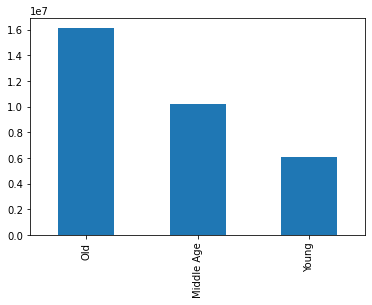

In [58]:
# age profile

age_bar = df['age_profile'].value_counts().plot.bar()

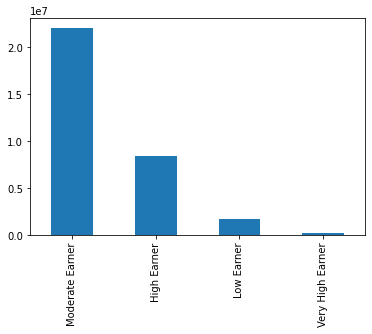

In [59]:
# income profile

income_bar = df['income_profile'].value_counts().plot.bar()

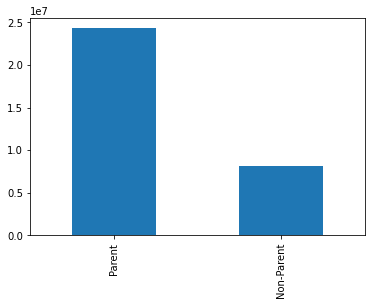

In [60]:
# parent profile

parent_bar = df['parent_flag'].value_counts().plot.bar()

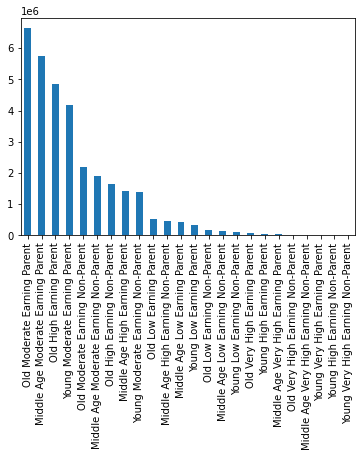

In [61]:
# overall customer profile

profile_bar = df['customer_profile'].value_counts().plot.bar()

## Aggregate max, mean and min

In [62]:
# number of orders a customer placed by profile

df.groupby('customer_profile').agg({'max_order': ['mean', 'min', 'max']})

max_order        
                                              mean min max
customer_profile                                          
Middle Age High Earning Non-Parent       32.693066   3  99
Middle Age High Earning Parent           32.455399   3  99
Middle Age Low Earning Non-Parent        30.001817   3  99
Middle Age Low Earning Parent            29.987528   3  99
Middle Age Moderate Earning Non-Parent   33.248292   3  99
Middle Age Moderate Earning Parent       33.556169   3  99
Middle Age Very High Earning Non-Parent  50.770319   3  99
Middle Age Very High Earning Parent      40.529331   3  99
Old High Earning Non-Parent              34.432796   2  99
Old High Earning Parent                  32.944512   1  99
Old Low Earning Non-Parent               32.894168   3  99
Old Low Earning Parent                   29.883908   2  99
Old Moderate Earning Non-Parent          33.028976   3  99
Old Moderate Earning Parent              32.884211   2  99
Old Very High Earning Non-Parent         39.586329   3  99
Old Very High Earning Parent             35.372978   3  99
Young High Earning Non-Parent            37.866442   3  85
Young High Earning Parent                42.330991   3  99
Young Low Earning Non-Parent             29.928047   3  99
Young Low Earning Parent                 29.349252   3  99
Young Moderate Earning Non-Parent        32.970703   3  99
Young Moderate Earning Parent            33.261692   3  99
Young Very High Earning Non-Parent       28.561905   4  50
Young Very High Earning Parent           35.988303   3  99

In [63]:
# price of an order by profile

df.groupby('customer_profile').agg({'prices': ['mean', 'min', 'max']})

prices           
                                             mean  min   max
customer_profile                                            
Middle Age High Earning Non-Parent       7.950296  1.0  25.0
Middle Age High Earning Parent           7.965021  1.0  25.0
Middle Age Low Earning Non-Parent        6.486034  1.0  25.0
Middle Age Low Earning Parent            6.486325  1.0  25.0
Middle Age Moderate Earning Non-Parent   7.855329  1.0  25.0
Middle Age Moderate Earning Parent       7.850928  1.0  25.0
Middle Age Very High Earning Non-Parent  7.825914  1.0  25.0
Middle Age Very High Earning Parent      7.794588  1.0  25.0
Old High Earning Non-Parent              7.951838  1.0  25.0
Old High Earning Parent                  7.965662  1.0  25.0
Old Low Earning Non-Parent               6.502721  1.0  25.0
Old Low Earning Parent                   6.508923  1.0  25.0
Old Moderate Earning Non-Parent          7.779118  1.0  25.0
Old Moderate Earning Parent              7.766213  1.0  25.0
Old Very High Earning Non-Parent         7.802939  1.0  25.0
Old Very High Earning Parent             7.754430  1.0  25.0
Young High Earning Non-Parent            7.789533  1.0  25.0
Young High Earning Parent                7.818798  1.0  25.0
Young Low Earning Non-Parent             6.479810  1.0  25.0
Young Low Earning Parent                 6.490690  1.0  25.0
Young Moderate Earning Non-Parent        7.877600  1.0  25.0
Young Moderate Earning Parent            7.888451  1.0  25.0
Young Very High Earning Non-Parent       7.807455  1.0  24.3
Young Very High Earning Parent           7.730514  1.0  25.0

## Compare customer profile with region (Q8)

In [66]:
crosstab_cust_prof = pd.crosstab(df['customer_profile'], df['region'], dropna = False)

In [67]:
crosstab_cust_prof

region,Midwest,Northeast,South,West
customer_profile,,,,
Middle Age High Earning Non-Parent,118610,76069,171808,110736
Middle Age High Earning Parent,332136,262366,442348,386511
Middle Age Low Earning Non-Parent,35689,25129,49324,35710
Middle Age Low Earning Parent,110947,75561,142725,107252
Middle Age Moderate Earning Non-Parent,446897,323550,633485,492324
Middle Age Moderate Earning Parent,1346600,1018518,1940824,1438830
Middle Age Very High Earning Non-Parent,4401,2709,7502,2355
Middle Age Very High Earning Parent,12206,5223,12098,12545
Old High Earning Non-Parent,386110,294684,531855,435327


## Q10 Data Export

In [68]:
df.to_pickle(os.path.join(path, '02 Data', 'Prepared Data', 'data_4_10.pkl'))

In [69]:
df.shape

(32404859, 41)